### *Importing Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### *Load Dataset*

In [2]:
dataset = pd.read_csv('dataset.csv')

### *Summarize Dataset*

In [4]:
print(dataset.shape)
print(dataset.head(10))

(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
5           6  Female   22                  17              76
6           7  Female   35                  18               6
7           8  Female   23                  18              94
8           9    Male   64                  19               3
9          10  Female   30                  19              72


### *Segregate*

### *Mapping*

In [5]:
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1}).astype(int)
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1       0   19                  15              39
1           2       0   21                  15              81
2           3       1   20                  16               6
3           4       1   23                  16              77
4           5       1   31                  17              40


### *Finding the Optimized K Value*

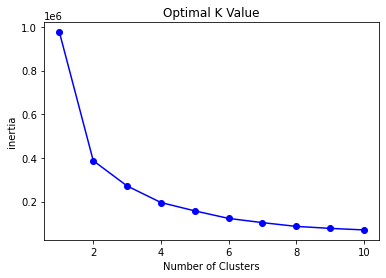

In [7]:
from sklearn.cluster import KMeans
lst = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataset)
    lst.append(km.inertia_)

plt.plot(range(1,11),lst,color='blue', marker='o')
plt.title('Optimal K Value')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

# Training

In [14]:
model = KMeans(n_clusters=5, random_state=0)
y_means = model.fit_predict(dataset)
y_means

array([1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

### *Visualize*

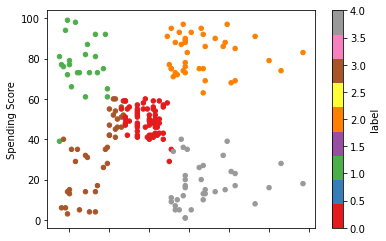

In [15]:
labels = model.labels_
labels = pd.DataFrame(labels)

df = pd.concat([dataset, labels], axis=1)
df = df.rename(columns={0:'label'})

df.plot.scatter(x='Annual Income (k$)', y= 'Spending Score', c='label', colormap='Set1')

# using AgglomerativeClustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
model1 = AgglomerativeClustering(n_clusters = 5, linkage='average')

y_mean = model1.fit_predict(dataset)
y_mean

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

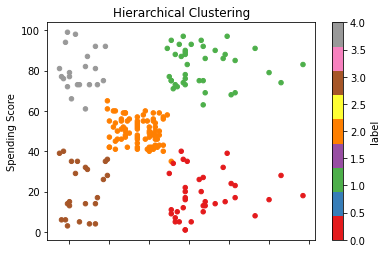

In [20]:
labels = model1.labels_
labels = pd.DataFrame(labels)

df = pd.concat([dataset, labels], axis=1)
df = df.rename(columns={0:'label'})

df.plot.scatter(x='Annual Income (k$)', y= 'Spending Score', c='label', colormap='Set1')
plt.title('Hierarchical Clustering')
plt.show()